## Part 05

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import gc

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
%matplotlib inline

!pip install koreanize-matplotlib
import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 60.1 MB/s eta 0:00:00


In [3]:
pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42655 sha256=ea838c4cc05b7c157c8d6359a9d60cf7f9ed4a7ae4f38742735350da0f9b805f
  Stored in directory: /root/.cache/pip/wheels/a2/af/06/f4d4ed4d9d714fda437fb1583629417319603c2266e7b233cc
Successfully built factor_analyzer


In [4]:
df = pd.read_csv('/content/drive/MyDrive/week_hands_on_project5/whiskey/dataset/whisky_framed.csv')
df.columns = df.columns.str.lower()
print(df.shape)
df.head()

(1083, 57)


,name,whisky_type,volume(cl),alcohol(%),alcohol_density,price(£),price_per_cl,style_body,style_richness,style_smoke,style_sweetness,country,region,casktype,cask_group,bottler,bottler_group,is_independent,colouring,age,vintage,bottling_decade,is_vintage,has_age,has_bottling_decade,is_nas,characters,nose,palate,finish,food_paring,reviews,is_no_note,url,strong_smoke,style_missing,flavour_note,smoky_family,fruity_family,floral_family,herbal_family,sweet_family,nutty_family,spicy_family,woody_family,earthy_family,malty_family,creamy_family,wine_family,marine_family,other_family,body_tag,richness_tag,smoke_tag,sweetness_tag,flavour_pattern,family_combo
0,Blended Scotch TB-BSW6 Year Old Thompson Bros,blended,70.0,46.0,3220.0,34.25,0.489286,3.0,3.0,0.0,3.0,scotland,unknown_scotland,not specified,unknown,NaN,thompson bros,1,False,6.0,NaN,NaN,0,1,0,0,"Figs, Sultana, Cinnamon, Nutmeg, Toffee, Coffee","Plum sauce, miso, golden sultanas, cinder toff...","Golden sultanas, raisin loaf, buttered Jamaica...","Soft warm spice; allspice, nutmeg and cinnamon...",NaN,"Stunning stuff for the money, might well be my...",0,https://www.thewhiskyexchange.com/p/67983/blen...,0,0,"Figs, Sultana, Cinnamon, Nutmeg, Toffee, Coffe...",0,1,0,0,1,0,1,0,0,0,0,0,0,0,medium,round,non,balanced,medium_round_non_balanced,"('fruity', 'sweet', 'spicy')"
1,Johnnie Walker Blue Label,blended,70.0,40.0,2800.0,158.00,2.257143,3.0,3.0,1.0,2.0,scotland,unknown_scotland,not specified,unknown,NaN,distillery bottling,0,True,NaN,NaN,NaN,0,0,0,1,"Rose, Hazelnut, Honey, Smoke, Dark Chocolate, ...","Smooth, silky cereal, syrupy flapjacks, polish...",A silky caress. Unexpectedly strong spicy entr...,A perfectly-integrated slow fade of the palate...,"Octopus, Monkfish, Fondue",Un elixir. || Excellent Whisky. Smooth on the ...,0,https://www.thewhiskyexchange.com/p/552/johnni...,0,0,"Rose, Hazelnut, Honey, Smoke, Dark Chocolate, ...",0,0,1,0,1,1,1,1,1,1,0,0,0,1,medium,round,light_smoke,balanced,medium_round_light_smoke_balanced,"('floral', 'sweet', 'nutty', 'spicy', 'woody',..."
2,The Big Ben,blended,50.0,40.0,2000.0,23.50,0.470000,NaN,NaN,NaN,NaN,scotland,unknown_scotland,not specified,unknown,NaN,distillery bottling,0,True,NaN,NaN,NaN,0,0,0,1,no description,"Medium weight, malty nose, with hints of orang...","Medium depth, hints of smokiness and sweetness...",Elegant finish.,NaN,Very pleased with the whiskey. Highly recommend,0,https://www.thewhiskyexchange.com/p/18213/the-...,0,1,"Medium weight, malty nose, with hints of orang...",0,1,0,0,0,0,0,0,0,1,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
3,J&B Rare,blended,70.0,40.0,2800.0,25.25,0.360714,NaN,NaN,NaN,NaN,scotland,unknown_scotland,not specified,unknown,NaN,distillery bottling,0,True,NaN,NaN,NaN,0,0,0,1,no description,no description,no description,no description,NaN,Very nice || Was delighted to find this whisky...,1,https://www.thewhiskyexchange.com/p/544/jb-rare,0,1,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,Dimple 15 Year OldLitre,blended,100.0,43.0,4300.0,69.95,0.699500,3.0,3.0,0.0,3.0,scotland,unknown_scotland,not specified,unknown,NaN,distillery bottling,0,Unknown,15.0,NaN,NaN,0,1,0,0,"Caramel, Cinnamon, Vanilla, Dark Chocolate",no description,no description,no description,NaN,NaN,0,https://www.thewhiskyexchange.com/p/79846/dimp...,0,0,"Caramel, Cinnamon, Vanilla, Dark Chocolate",0,0,0,0,1,0,1,0,0,0,0,0,0,0,medium,round,non,balanced,medium_round_non_balanced,"('sweet', 'spicy')"


# PCA


📎  <결과>

☑️  본 데이터의 맛 특성(Body, Richness, Smoke, Sweetness)은<br>
두 개의 잠재적 맛 요인(latent taste factors) 으로 구조화된다.<br>

첫 번째 요인은 **Fullness/Richness 축**, <br>
두 번째 요인은 **Smoky–Sweetness 대립 축**이며,<br>
**두 요인의 조합으로 위스키 전체 맛의 70% 이상이 설명**된다.<br>

 <br>
1️⃣ 우측 아래쪽 ~ 중앙 근처에 등고선이 가장 진함. 즉, 시장 **대부분이 "중간/   균형형 스타일**"을 가지고 있다. <br>
2️⃣ 반면, 아주 스모키하거나 드라이한 **개성이 강한 스타일들은 소수** 외곽에 위치에 있다.

    

    PC1 (0.41) : Full–Rich Axis (무게감/풍부함)
          	•	body, richness, sweetness가 양의 방향으로 높은 loading
	        •	smoke는 거의 기여하지 않음

    PC2 (0.32) : Smoky vs Sweet axis
            • 스모키한 맛과 달콤·부드러운 맛의 대립 축

    PC3 (0.17) : Sweet + Smoke 복합축 (보조적 역할)
        	•	smoke, sweetness 모두 높은 loading
	        •	특정 스타일 그룹에서만 나타나는 “복합 풍미 축”

    PC4 (0.11) : noise

Explained Variance Ratio:
PC1: 0.4082
PC2: 0.3170
PC3: 0.1664
PC4: 0.1084


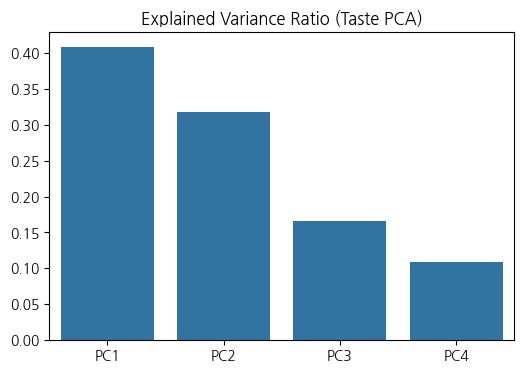


PCA Component Loadings:


,PC1,PC2,PC3,PC4
style_body,0.668606,0.190718,-0.005945,0.718719
style_richness,0.658854,0.156728,-0.330730,-0.657241
style_smoke,-0.027296,0.751544,0.637146,-0.168765
style_sweetness,0.343703,-0.611756,0.696152,-0.151645


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# style 지표 존재하는 행
df_style = df[df['style_missing'] == 0]
style_cols = ['style_body', 'style_richness', 'style_smoke', 'style_sweetness']

def run_pca_taste(df, style_cols):
    X = df[style_cols].dropna()
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    pca = PCA(n_components=4)
    X_pca = pca.fit_transform(X_scaled)

    # 고유값 / 설명분산
    exp = pca.explained_variance_ratio_

    print("Explained Variance Ratio:")
    for i, v in enumerate(exp, 1):
        print(f"PC{i}: {v:.4f}")

    # 시각화
    plt.figure(figsize=(6,4))
    sns.barplot(x=[f"PC{i}" for i in range(1,5)], y=exp)
    plt.title("Explained Variance Ratio (Taste PCA)")
    plt.show()

    loading = pd.DataFrame(
        pca.components_.T,
        index=style_cols,
        columns=[f"PC{i}" for i in range(1,5)]
    )
    print("\nPCA Component Loadings:")
    display(loading)

    return pca, X_pca, loading

pca, X_pca, pca_loading = run_pca_taste(df_style, style_cols)

## PCA 2D

📎  <결과><br>

☑️ 시각화 면에서 크게 다섯가지로 구분할 수 있었습니다. <br>
이 중 마지막 LOW NON-SMOKE & BALANCED 에 많은 제품들이 속합니다.
| Category               | PC1 | PC2 |
|------------------------|------|------|
| LIGHT & SWEET          | 낮음 | 낮음 |
| LIGHT & DRY & SMOKY    | 낮음 | 높음 |
| RICH & SMOKY           | 높음 | 높음 |
| RICH & SWEET           | 높음 | 낮음 |
| LOW-NON-SMOKE & BALANCED   | 중간 | 중간 |

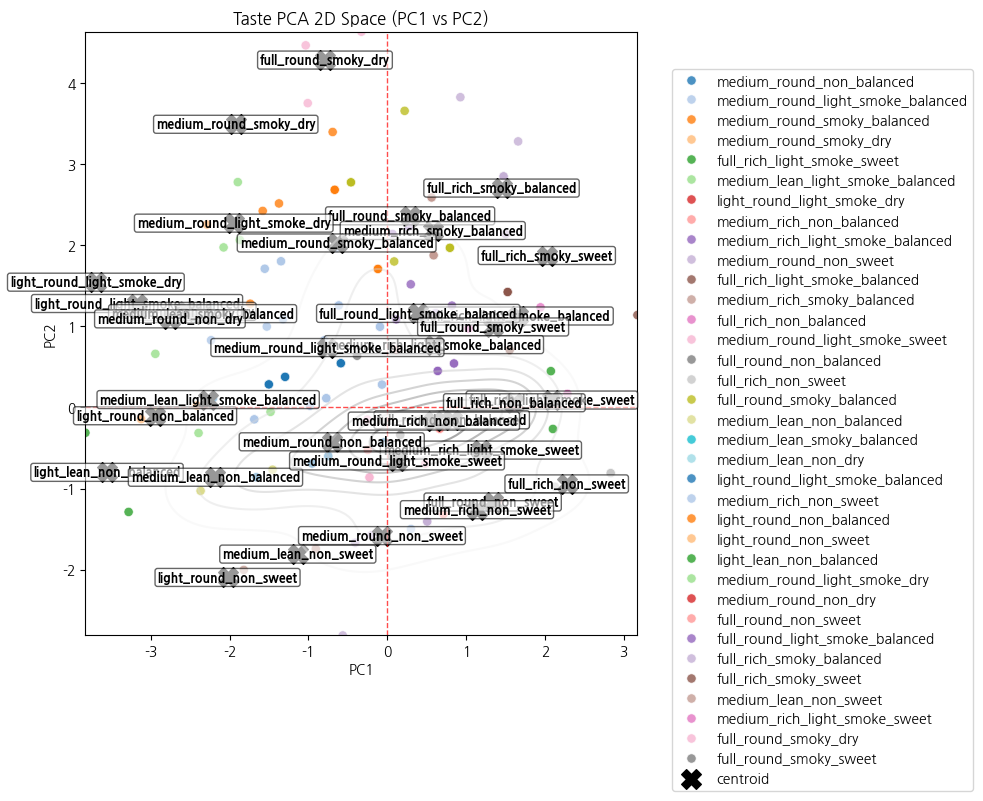

In [6]:
from scipy.stats import gaussian_kde

def plot_pca_taste_space(df, X_pca, pattern_col="flavour_pattern"):

    # df와 PCA 결과 합치기
    df_plot = df.dropna(subset=style_cols).copy()
    df_plot["PC1"] = X_pca[:, 0]
    df_plot["PC2"] = X_pca[:, 1]

    plt.figure(figsize=(10, 8))

    # ----- Optional Density Contour (전체 분포) -----
    x = df_plot["PC1"].values
    y = df_plot["PC2"].values

    # 커널 밀도 추정
    kde = gaussian_kde([x, y])
    xi, yi = np.mgrid[
        x.min():x.max():200j,
        y.min():y.max():200j
    ]
    zi = kde(np.vstack([xi.flatten(), yi.flatten()]))

    # contour
    plt.contour(xi, yi, zi.reshape(xi.shape),
                levels=8, cmap="Greys", alpha=0.4)

    # ----- Scatter -----
    sns.scatterplot(
        data=df_plot,
        x="PC1", y="PC2",
        hue=pattern_col,
        palette="tab20",
        s=45,
        alpha=0.8
    )

    # ----- centroid 계산 -----
    centroids = df_plot.groupby(pattern_col)[["PC1", "PC2"]].mean()

    # centroid 표시
    plt.scatter(
        centroids["PC1"], centroids["PC2"],
        s=200, color="black", marker="X", label="centroid"
    )

    # centroid 라벨
    for pattern, row in centroids.iterrows():
        plt.text(
            row["PC1"], row["PC2"],
            f"{pattern}",
            fontsize=9,
            weight="bold",
            ha="center", va="center",
            color="black",
            bbox=dict(boxstyle="round,pad=0.2", fc="white", alpha=0.6)
        )

    #  기준선 추가 (PC1 = 0, PC2 = 0)
    plt.axvline(0, color='red', linestyle='--', linewidth=1, alpha=0.7)  # vertical line
    plt.axhline(0, color='red', linestyle='--', linewidth=1, alpha=0.7)  # horizontal line

    plt.title("Taste PCA 2D Space (PC1 vs PC2)")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend(loc='best', bbox_to_anchor=(1.05, 0.95))
    plt.tight_layout()
    plt.show()



plot_pca_taste_space(df_style, X_pca, pattern_col="flavour_pattern")

# FA

In [7]:
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler

def run_factor_analysis(df, style_cols, n_factors=2):
    # 1) 데이터 선택 및 스케일링
    X = df[style_cols].dropna()
    scaler = StandardScaler()
    X_std = scaler.fit_transform(X)

    # 2) Factor Analysis
    fa = FactorAnalyzer(n_factors=n_factors, rotation='varimax')
    fa.fit(X_std)

    # 3) Loadings → DataFrame + display로 표 출력
    loadings = pd.DataFrame(
        fa.loadings_,
        index=style_cols,
        columns=[f"Factor{i}" for i in range(1, n_factors+1)]
    )
    print("\n Factor Loadings")
    display(loadings)

    # 4) Scores → DataFrame + display로 표 출력
    scores = fa.transform(X_std)
    score_df = pd.DataFrame(
        scores,
        index=X.index,
        columns=[f"F{i}" for i in range(1, n_factors+1)]
    )
    print("\n Factor Scores (first 10 rows)")
    display(score_df.head(10))

    # df에 factor score 붙이기
    df.loc[X.index, ['F1', 'F2'][:n_factors]] = score_df.iloc[:, :n_factors]

    return fa, loadings, score_df, df

run_factor_analysis(df_style, style_cols, n_factors=2)


 Factor Loadings


,Factor1,Factor2
style_body,0.941743,-0.007486
style_richness,0.587320,-0.058332
style_smoke,0.107636,0.606974
style_sweetness,0.184098,-0.513557



 Factor Scores (first 10 rows)


,F1,F2
0,-0.124757,-0.278846
1,-0.135418,0.780624
4,-0.124757,-0.278846
9,-1.393501,1.723121
10,-0.223236,2.353038
12,1.242560,-0.393779
13,-0.177270,0.705857
15,-0.050827,1.136429
17,-0.100114,0.192913
18,-0.124757,-0.278846


(FactorAnalyzer(n_factors=2, rotation='varimax', rotation_kwargs={}),
                   Factor1   Factor2
 style_body       0.941743 -0.007486
 style_richness   0.587320 -0.058332
 style_smoke      0.107636  0.606974
 style_sweetness  0.184098 -0.513557,
             F1        F2
 0    -0.124757 -0.278846
 1    -0.135418  0.780624
 4    -0.124757 -0.278846
 9    -1.393501  1.723121
 10   -0.223236  2.353038
 ...        ...       ...
 1075  1.116118 -0.824351
 1079 -0.050827  1.136429
 1080 -0.022957 -0.320032
 1081 -0.124757 -0.278846
 1082  1.182612 -0.277826
 
 [618 rows x 2 columns],
                                                    name  whisky_type  \
 0         Blended Scotch TB-BSW6 Year Old Thompson Bros      blended   
 1                             Johnnie Walker Blue Label      blended   
 4                               Dimple 15 Year OldLitre      blended   
 9                Johnnie Walker Black Label 12 Year Old      blended   
 10                 Maclean's Nose Blend

FA 두 요소가 PCA 1,2 와 비슷한 형태임 <br>

      - Factor 1 : Richness / Body
      - Factor 2 : Smoky vs Sweet

**요인 수는 선택이지만, whisky style space를 해석 가능하게 만들고 클러스터링/추천 시스템에서 안정적으로 쓰려면 FA 2개 요인이 가장 최적이라고 판단함 **

✔ “Factor2는 smoke/sweetness가 만들어내는 잠재적 방향이다.”

✔ “단일 제품 간 비교에서는 factor score가 직관과 다르게 보일 수 있다.”

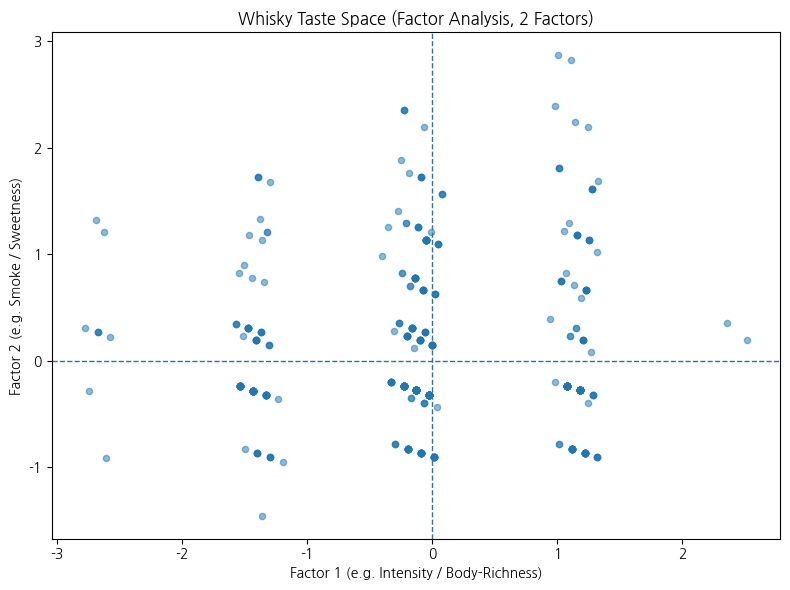

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(df_style["F1"], df_style["F2"], alpha=0.5, s=20)

plt.axhline(0, linestyle="--", linewidth=1)
plt.axvline(0, linestyle="--", linewidth=1)

plt.xlabel("Factor 1 (e.g. Intensity / Body-Richness)")
plt.ylabel("Factor 2 (e.g. Smoke / Sweetness)")
plt.title("Whisky Taste Space (Factor Analysis, 2 Factors)")
plt.tight_layout()
plt.show()

In [9]:
# 요인들과 패턴들 비교해서 확인

factors_pattern = df_style.groupby("flavour_pattern").agg(f1_mean=("F1", "mean"),
                                        f2_mean=("F2", "mean"),
                                        f1_min=("F1", "min"),
                                        f1_max=("F1", "max"),
                                        f2_min=("F2", "min"),
                                        f2_max=("F2", "max"),
                                        f1_med=("F1", "median"),
                                        f2_med=("F2", "median"),
                                        f1_std=("F1", "std"),
                                        f2_std=("F2", "std"),
                                        count=("flavour_pattern", "count"),)

factors_pattern.sort_values(by=['f1_mean','f2_mean'])

,f1_mean,f2_mean,f1_min,f1_max,f2_min,f2_max,f1_med,f2_med,f1_std,f2_std,count
flavour_pattern,,,,,,,,,,,
light_lean_non_balanced,-2.757146,0.012971,-2.774798,-2.739493,-0.280885,0.306827,-2.757146,0.012971,0.024964,0.415575,2
light_round_light_smoke_dry,-2.683661,1.325110,-2.683661,-2.683661,1.325110,1.325110,-2.683661,1.325110,NaN,NaN,1
light_round_non_balanced,-2.647549,0.255344,-2.672999,-2.571200,0.224454,0.265640,-2.672999,0.265640,0.050900,0.020593,4
light_round_light_smoke_balanced,-2.623713,1.209157,-2.623713,-2.623713,1.209157,1.209157,-2.623713,1.209157,NaN,NaN,1
light_round_non_sweet,-2.602390,-0.909782,-2.602390,-2.602390,-0.909782,-0.909782,-2.602390,-0.909782,NaN,NaN,1
medium_round_non_dry,-1.502734,0.895557,-1.502734,-1.502734,0.895557,0.895557,-1.502734,0.895557,NaN,NaN,1
medium_lean_non_balanced,-1.215969,-0.168653,-1.569229,-0.328355,-0.238679,0.349032,-1.533924,-0.238679,0.544504,0.176494,30
medium_lean_light_smoke_balanced,-1.119193,0.443052,-1.544586,-0.303712,0.233079,0.820791,-1.509281,0.275285,0.706448,0.327811,3
medium_lean_smoky_balanced,-0.908110,1.218292,-1.459995,-0.356225,1.176596,1.259988,-0.908110,1.218292,0.780483,0.058967,2


In [10]:
# 빈도 높은 위스키
print(f"<빈도 높은 위스키>\n")
display(factors_pattern.sort_values(by=['count'],ascending=False)[:10])
print(f"\n\n<빈도 낮은 위스키>\n")
display(factors_pattern.sort_values(by=['count'],ascending=False)[-10:])

<빈도 높은 위스키>



,f1_mean,f2_mean,f1_min,f1_max,f2_min,f2_max,f1_med,f2_med,f1_std,f2_std,count
flavour_pattern,,,,,,,,,,,
medium_round_non_balanced,-0.553445,-0.180677,-1.467430,-0.124757,-0.321051,0.350052,-0.226556,-0.278846,0.584634,0.215770,161
full_rich_non_balanced,1.206156,-0.252192,1.147307,2.352877,-0.319012,0.352091,1.182612,-0.277826,0.147895,0.129243,64
medium_round_light_smoke_balanced,-0.429786,0.561328,-1.442787,-0.075470,0.150707,1.293569,-0.135418,0.664671,0.531569,0.375702,59
medium_rich_non_balanced,-0.051163,-0.260923,-1.228527,-0.022957,-0.362238,0.267679,-0.022957,-0.320032,0.172037,0.180139,49
medium_round_non_sweet,-0.428975,-0.869025,-1.396820,-0.089452,-1.455288,-0.825371,-0.191251,-0.866557,0.525032,0.096350,42
full_round_non_balanced,1.074177,-0.218026,0.943709,1.080813,-0.236640,0.392258,1.080813,-0.236640,0.028069,0.104845,36
medium_lean_non_balanced,-1.215969,-0.168653,-1.569229,-0.328355,-0.238679,0.349032,-1.533924,-0.238679,0.544504,0.176494,30
medium_round_smoky_balanced,-0.314875,1.380421,-1.393501,-0.050827,1.135410,2.195899,-0.050827,1.136429,0.524154,0.327535,26
full_rich_non_sweet,1.239348,-0.874208,1.217917,1.319716,-0.906724,-0.865537,1.217917,-0.865537,0.042639,0.017251,19




<빈도 낮은 위스키>



,f1_mean,f2_mean,f1_min,f1_max,f2_min,f2_max,f1_med,f2_med,f1_std,f2_std,count
flavour_pattern,,,,,,,,,,,
medium_lean_smoky_balanced,-0.908110,1.218292,-1.459995,-0.356225,1.176596,1.259988,-0.908110,1.218292,0.780483,0.058967,2
light_lean_non_balanced,-2.757146,0.012971,-2.774798,-2.739493,-0.280885,0.306827,-2.757146,0.012971,0.024964,0.415575,2
light_round_non_sweet,-2.602390,-0.909782,-2.602390,-2.602390,-0.909782,-0.909782,-2.602390,-0.909782,NaN,NaN,1
full_round_smoky_sweet,1.190047,0.590924,1.190047,1.190047,0.590924,0.590924,1.190047,0.590924,NaN,NaN,1
light_round_light_smoke_balanced,-2.623713,1.209157,-2.623713,-2.623713,1.209157,1.209157,-2.623713,1.209157,NaN,NaN,1
light_round_light_smoke_dry,-2.683661,1.325110,-2.683661,-2.683661,1.325110,1.325110,-2.683661,1.325110,NaN,NaN,1
full_rich_smoky_sweet,1.316489,1.021496,1.316489,1.316489,1.021496,1.021496,1.316489,1.021496,NaN,NaN,1
medium_lean_non_dry,-0.398964,0.978949,-0.398964,-0.398964,0.978949,0.978949,-0.398964,0.978949,NaN,NaN,1
medium_rich_light_smoke_sweet,0.036990,-0.435985,0.036990,0.036990,-0.435985,-0.435985,0.036990,-0.435985,NaN,NaN,1


# Recommendation Model

In [11]:
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import NearestNeighbors

In [12]:
%%writefile /content/drive/MyDrive/week_hands_on_project5/whiskey/model/recommender_model.py

import numpy as np
import pandas as pd

from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import NearestNeighbors
class WhiskyRecommender:
    """
    Whisky Recommender (FA taste + Meta KNN 기반)

    시나리오
    --------
    - Scenario A: 스타일 있는 제품(들)을 기준으로 추천
    - Scenario B: 스타일 없는 제품(들)을 기준으로 추천
    - Scenario C: 설문(Body/Rich/Smoke/Sweet + family)만으로 추천

    특징
    ----
    - taste space: style_body, style_richness, style_smoke, style_sweetness → FA(2차원)
    - meta space:
        * categorical: whisky_type, region, bottler_group, cask_group, age_bin, price_bin
        * numeric: vintage_flag (0/1)
        * age, price는 bin + Unknown (NA를 median으로 채우지 않음)
        * whisky_type > region > bottler_group > cask_group 순으로 가중치
    - special item 분리: 빈티지 / 고연산 / 고가 / high rarity 제품을 따로
    - 설명:
        * taste_explanation: “비슷한 맛 기반” 안내문
        * meta_explanation: “어떤 meta 공통점으로 추천했는지” 안내문
    """

    # --------------------------------------------------------- #
    #                          INIT                             #
    # --------------------------------------------------------- #
    def __init__(
        self,
        df: pd.DataFrame,
        style_cols=None,
        family_cols=None,
        n_taste_neighbors: int = 200,
        n_meta_neighbors: int = 200,
    ):
        self.df = df.copy()

        self.style_cols = style_cols or [
            "style_body",
            "style_richness",
            "style_smoke",
            "style_sweetness",
        ]

        # *_family 자동 탐색
        if family_cols is None:
            self.family_cols = [c for c in self.df.columns if c.endswith("_family")]
        else:
            self.family_cols = family_cols

        # taste space
        self._build_taste_space(n_taste_neighbors)

        # meta space
        self._build_meta_space(n_meta_neighbors)

    # --------------------------------------------------------- #
    #                    TASTE SPACE (FA)                       #
    # --------------------------------------------------------- #
    def _build_taste_space(self, n_neighbors: int):
        if "style_missing" not in self.df.columns:
            raise ValueError("df에 'style_missing' 컬럼이 필요합니다. (0=style有, 1=style無)")

        mask = (self.df["style_missing"] == 0)
        df_taste_raw = self.df.loc[mask].dropna(subset=self.style_cols).copy()

        if df_taste_raw.empty:
            self.df_taste = df_taste_raw
            self.scaler_taste = None
            self.fa_model = None
            self.knn_taste = None
            self._taste_index = np.array([], dtype=int)
            return

        # 1) 표준화
        scaler = StandardScaler()
        X_std = scaler.fit_transform(df_taste_raw[self.style_cols])

        # 2) Factor Analysis
        fa = FactorAnalyzer(n_factors=2, rotation="varimax")
        fa.fit(X_std)
        scores = fa.transform(X_std)

        df_taste_raw["FA1"] = scores[:, 0]
        df_taste_raw["FA2"] = scores[:, 1]

        # 전체 df 에 붙이기
        self.df["FA1"] = np.nan
        self.df["FA2"] = np.nan
        self.df.loc[df_taste_raw.index, "FA1"] = df_taste_raw["FA1"]
        self.df.loc[df_taste_raw.index, "FA2"] = df_taste_raw["FA2"]

        self.df_taste = df_taste_raw
        self.scaler_taste = scaler
        self.fa_model = fa

        # 3) KNN fitting
        X_taste = df_taste_raw[["FA1", "FA2"]].values
        n_neighbors = min(n_neighbors, len(df_taste_raw))

        knn = NearestNeighbors(n_neighbors=n_neighbors, metric="euclidean")
        knn.fit(X_taste)

        self.knn_taste = knn
        self._taste_index = df_taste_raw.index.to_numpy()

    # --------------------------------------------------------- #
    #                 META SPACE (ABV 제거 버전)                 #
    # --------------------------------------------------------- #
    def _build_meta_space(self, n_neighbors: int):

        df_meta = self.df.copy()

        # --------------------
        # 1) age_bin
        # --------------------
        def age_to_bin(x):
            if pd.isna(x):
                return "Unknown"
            x = int(x)
            if x <= 8:
                return "0-8"
            elif x <= 12:
                return "9-12"
            elif x <= 16:
                return "13-16"
            elif x <= 21:
                return "17-21"
            else:
                return "22+"

        if "age" in df_meta.columns:
            df_meta["age_bin"] = df_meta["age"].apply(age_to_bin)
        else:
            df_meta["age_bin"] = "Unknown"

        # --------------------
        # 2) vintage_flag
        # --------------------
        if "is_vintage" in df_meta.columns:
            df_meta["vintage_flag"] = df_meta["is_vintage"].astype(int)
        elif "vintage" in df_meta.columns:
            df_meta["vintage_flag"] = np.where(df_meta["vintage"].notna(), 1, 0)
        else:
            df_meta["vintage_flag"] = 0

        # --------------------
        # 3) price_bin
        # --------------------
        def price_to_bin(x):
            if pd.isna(x):
                return "Unknown"
            x = float(x)
            if x < 40:
                return "low"
            elif x < 80:
                return "mid"
            elif x < 150:
                return "high"
            elif x < 300:
                return "premium"
            else:
                return "luxury"

        if "price(£)" in df_meta.columns:
            df_meta["price_bin"] = df_meta["price(£)"].apply(price_to_bin)
        else:
            df_meta["price_bin"] = "Unknown"

        # 🔴 원본 df에도 같이 붙여둠 (추천 결과에서 바로 보이도록)
        self.df["age_bin"] = df_meta["age_bin"]
        self.df["price_bin"] = df_meta["price_bin"]
        self.df["vintage_flag"] = df_meta["vintage_flag"]

        # --------------------
        # 4) categorical / numeric feature 리스트
        # --------------------
        cat_features = [
            "whisky_type",
            "region",
            "bottler_group",
            "cask_group",
            "age_bin",
            "price_bin",
        ]
        num_features = ["vintage_flag"]

        # 결측값 처리 (카테고리는 Unknown)
        for col in ["whisky_type", "region", "bottler_group", "cask_group"]:
            if col not in df_meta.columns:
                df_meta[col] = "Unknown"
            else:
                df_meta[col] = df_meta[col].fillna("Unknown")

        # 저장 (설명용)
        self.meta_cat_features = cat_features
        self.meta_num_features = num_features

        # --------------------
        # 5) OneHot + Standardize
        # --------------------
        preprocessor = ColumnTransformer(
            transformers=[
                ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
                ("num", StandardScaler(), num_features),
            ]
        )

        X_meta_raw = preprocessor.fit_transform(df_meta[cat_features + num_features])

        # --------------------
        # 6) 가중치 적용 (type > region > bottler > cask)
        # --------------------
        cat_encoder = preprocessor.named_transformers_["cat"]
        cat_names = cat_encoder.get_feature_names_out(cat_features)

        n_cat = len(cat_names)
        X_cat = X_meta_raw[:, :n_cat]
        X_num = X_meta_raw[:, n_cat:]

        X_cat = X_cat.toarray() if hasattr(X_cat, "toarray") else X_cat
        X_num = X_num.toarray() if hasattr(X_num, "toarray") else X_num

        def idx(prefix):
            return [i for i, name in enumerate(cat_names) if name.startswith(prefix + "_")]

        idx_type = idx("whisky_type")
        idx_region = idx("region")
        idx_bottler = idx("bottler_group")
        idx_cask = idx("cask_group")

        if idx_type:
            X_cat[:, idx_type] *= 3.0
        if idx_region:
            X_cat[:, idx_region] *= 2.0
        if idx_bottler:
            X_cat[:, idx_bottler] *= 1.5
        if idx_cask:
            X_cat[:, idx_cask] *= 1.0

        X_meta = np.hstack([X_cat, X_num])

        # save
        self.df_meta = df_meta
        self.X_meta = X_meta
        self.preprocessor_meta = preprocessor
        self._meta_cat_names = cat_names
        self._meta_n_cat = n_cat

        n_neighbors = min(n_neighbors, X_meta.shape[0])
        knn = NearestNeighbors(n_neighbors=n_neighbors, metric="euclidean")
        knn.fit(X_meta)

        self.knn_meta = knn
        self._meta_index = df_meta.index.to_numpy()

    # --------------------------------------------------------- #
    #                       UTILITIES                           #
    # --------------------------------------------------------- #
    def _get_index_by_name(self, name: str):
        matches = self.df.index[self.df["name"] == name]
        if len(matches) == 0:
            raise ValueError(f"name '{name}' not found.")
        return matches[0]

    def _make_style_from_levels(self, body_level, rich_level, smoke_level, sweet_level):
        body_map = {"light": 1, "medium": 2, "full": 3}
        rich_map = {"lean": 1, "round": 2, "rich": 3}
        smoke_map = {"non": 1, "light-smoky": 2, "smoky": 3}
        sweet_map = {"dry": 1, "balanced": 2, "sweet": 3}

        return np.array([
            body_map[body_level],
            rich_map[rich_level],
            smoke_map[smoke_level],
            sweet_map[sweet_level],
        ], dtype=float)

    def _project_style_to_factor(self, style_vec):
        if self.scaler_taste is None or self.fa_model is None:
            raise RuntimeError("taste space가 구성되어 있지 않습니다.")
        v_std = self.scaler_taste.transform(style_vec.reshape(1, -1))
        factor = self.fa_model.transform(v_std)
        return factor[0]  # (FA1, FA2)

    def _aggregate_product_points(self, product_list):
        """
        입력 제품 리스트 기준:
        - taste_center: FA1, FA2 평균 (style_missing=0인 애들만)
        - meta_center : meta embedding 평균
        """
        idx_list = [self._get_index_by_name(n) for n in product_list]

        # taste center
        idx_taste = [i for i in idx_list if i in self.df_taste.index]
        taste_center = None
        if idx_taste:
            taste_center = self.df_taste.loc[idx_taste, ["FA1", "FA2"]].mean().values

        # meta center
        pos = [np.where(self._meta_index == i)[0][0] for i in idx_list]
        meta_center = self.X_meta[pos].mean(axis=0)

        return taste_center, meta_center

    def _knn_taste_point(self, point, top_k):
        if self.knn_taste is None:
            raise RuntimeError("taste KNN이 구성되어 있지 않습니다.")

        n = min(top_k, len(self._taste_index))
        dists, idxs = self.knn_taste.kneighbors(point.reshape(1, -1), n_neighbors=n)
        reals = self._taste_index[idxs[0]]

        df_out = self.df.loc[reals].copy()
        df_out["taste_distance"] = dists[0]
        return df_out

    def _knn_meta_point(self, point, top_k):
        if self.knn_meta is None:
            raise RuntimeError("meta KNN이 구성되어 있지 않습니다.")

        n = min(top_k, self.X_meta.shape[0])
        dists, idxs = self.knn_meta.kneighbors(point.reshape(1, -1), n_neighbors=n)
        reals = self._meta_index[idxs[0]]

        df_out = self.df.loc[reals].copy()
        df_out["meta_distance"] = dists[0]
        return df_out

    def _filter_by_family(self, df_in, selected_families):
        if not selected_families:
            return df_in

        fam_cols = []
        for fam in selected_families:
            col = f"{fam}_family"
            if col in df_in.columns:
                fam_cols.append(col)
        if not fam_cols:
            return df_in

        mask = np.zeros(len(df_in), dtype=bool)
        for col in fam_cols:
            mask |= (df_in[col] == 1)

        return df_in.loc[mask].copy()

    # ---------------- special 분리 ---------------- #
    def _split_special_items(self, df_in):
        """
        빈티지 / 고연산 / 고가 / high rarity 제품을 별도 리스트로 분리
        """
        if df_in is None or df_in.empty:
            return df_in, df_in

        df = df_in.copy()
        idx = df.index

        is_vintage = df.get("is_vintage", pd.Series(0, index=idx))
        age = df.get("age", pd.Series(np.nan, index=idx))
        rarity = df.get("rarity_score", pd.Series(-np.inf, index=idx))
        price_bin = df.get("price_bin", pd.Series("Unknown", index=idx))

        special_mask = (
            (is_vintage == 1)
            | (age >= 21)
            | (rarity >= 3)
            | (price_bin.isin(["premium", "luxury"]))
        )

        return df[~special_mask].copy(), df[special_mask].copy()

    # ---------------- meta 설명 생성 ---------------- #
    def _explain_meta_center(self, meta_center_vec):
        """
        meta_center 벡터를 바탕으로
        '어떤 메타 공통점 때문에 추천되었는지' 설명 문자열 생성
        """
        if meta_center_vec is None:
            return ""

        cat_names = self._meta_cat_names
        n_cat = self._meta_n_cat

        X_cat_center = meta_center_vec[:n_cat]
        X_num_center = meta_center_vec[n_cat:]

        explanation = {}

        for feature in ["whisky_type", "region", "bottler_group",
                        "cask_group", "age_bin", "price_bin"]:
            cols = [
                i for i, name in enumerate(cat_names)
                if name.startswith(feature + "_")
            ]
            if not cols:
                continue
            best_idx = cols[np.argmax(X_cat_center[cols])]
            value = cat_names[best_idx].split(feature + "_", 1)[1]
            explanation[feature] = value

        # vintage_flag (numeric)
        if len(X_num_center) > 0:
            explanation["vintage_flag"] = 1 if X_num_center[0] > 0 else 0
        else:
            explanation["vintage_flag"] = 0

        # 자연어 텍스트
        lines = ["이 메타 추천은 아래 공통 특성을 기준으로 선정되었습니다:"]
        if "whisky_type" in explanation:
            lines.append(f"- Whisky Type: **{explanation['whisky_type']}**")
        if "region" in explanation:
            lines.append(f"- Region: **{explanation['region']}**")
        if "bottler_group" in explanation:
            lines.append(f"- Bottler Group: **{explanation['bottler_group']}**")
        if "cask_group" in explanation:
            lines.append(f"- Cask Group: **{explanation['cask_group']}**")
        if "age_bin" in explanation:
            lines.append(f"- Age Range: **{explanation['age_bin']}**")
        if "price_bin" in explanation:
            lines.append(f"- Price Tier: **{explanation['price_bin']}**")
        if explanation.get("vintage_flag", 0) == 1:
            lines.append(f"- Vintage: **Yes**")

        return "\n".join(lines)

    # --------------------------------------------------------- #
    #                       SCENARIO A                          #
    # --------------------------------------------------------- #
    def recommend_from_style_products(
        self,
        product_list,
        selected_families=None,
        top_k_taste=20,
        top_k_meta=20,
    ):
        if not product_list:
            raise ValueError("product_list가 비어 있습니다.")

        taste_center, meta_center = self._aggregate_product_points(product_list)
        if taste_center is None:
            raise ValueError("선택한 제품 중 style_missing=0 인 제품이 없습니다.")

        taste_df = self._knn_taste_point(taste_center, top_k_taste)
        meta_df = self._knn_meta_point(meta_center, top_k_meta)

        taste_fam_df = self._filter_by_family(taste_df, selected_families)

        # special split
        taste_main, taste_special = self._split_special_items(taste_df)
        meta_main, meta_special = self._split_special_items(meta_df)
        fam_main, fam_special = self._split_special_items(taste_fam_df)

        # 설명 문구
        taste_explanation = (
            "입력하신 제품들의 FA taste 위치(Body·Richness·Smoke·Sweetness 요인 점수)를 평균 내고, "
            "이와 가까운 순서대로 비슷한 맛의 위스키를 추천했습니다."
        )
        meta_explanation = self._explain_meta_center(meta_center)

        return {
            "mode": "product_style_yes",
            "input_products": product_list,
            "taste_explanation": taste_explanation,
            "meta_explanation": meta_explanation,
            "taste_based_main": taste_main.reset_index(drop=True),
            "taste_based_special": taste_special.reset_index(drop=True),
            "meta_based_main": meta_main.reset_index(drop=True),
            "meta_based_special": meta_special.reset_index(drop=True),
            "taste_with_family_main": fam_main.reset_index(drop=True),
            "taste_with_family_special": fam_special.reset_index(drop=True),
        }

    # --------------------------------------------------------- #
    #                       SCENARIO B                          #
    # --------------------------------------------------------- #
    def recommend_from_style_missing_products(
        self,
        product_list,
        top_k_meta=20,
    ):
        if not product_list:
            raise ValueError("product_list가 비어 있습니다.")

        _, meta_center = self._aggregate_product_points(product_list)
        meta_df = self._knn_meta_point(meta_center, top_k_meta)

        meta_main, meta_special = self._split_special_items(meta_df)

        has_style = meta_df[meta_df["style_missing"] == 0]
        taste_summary = {}
        if not has_style.empty:
            taste_summary = {
                "FA1_mean": float(has_style["FA1"].mean()),
                "FA2_mean": float(has_style["FA2"].mean()),
                "count": int(len(has_style)),
            }

        meta_explanation = self._explain_meta_center(meta_center)

        return {
            "mode": "product_style_no",
            "input_products": product_list,
            "meta_explanation": meta_explanation,
            "meta_based_main": meta_main.reset_index(drop=True),
            "meta_based_special": meta_special.reset_index(drop=True),
            "taste_summary": taste_summary,
        }

    # --------------------------------------------------------- #
    #                       SCENARIO C                          #
    # --------------------------------------------------------- #
    def recommend_from_survey(
        self,
        body_level="medium",
        rich_level="round",
        smoke_level="non",
        sweet_level="balanced",
        selected_families=None,
        top_k_taste=20,
        top_k_meta=20,
    ):
        # 스타일 벡터 → FA space
        style_vec = self._make_style_from_levels(
            body_level, rich_level, smoke_level, sweet_level
        )
        user_factor = self._project_style_to_factor(style_vec)

        taste_df = self._knn_taste_point(user_factor, top_k_taste)
        taste_fam_df = self._filter_by_family(taste_df, selected_families)

        # meta expansion (taste neighbor의 meta center)
        meta_df = pd.DataFrame()
        meta_explanation = ""
        if not taste_df.empty:
            idxs = taste_df.index
            pos = [np.where(self._meta_index == i)[0][0] for i in idxs]
            meta_center = self.X_meta[pos].mean(axis=0)
            meta_df = self._knn_meta_point(meta_center, top_k_meta)
            meta_explanation = self._explain_meta_center(meta_center)

        # special split
        taste_main, taste_special = self._split_special_items(taste_df)
        fam_main, fam_special = self._split_special_items(taste_fam_df)

        taste_explanation = (
            "선호 맛(Body: {b}, Rich: {r}, Smoke: {s}, Sweet: {sw})을 FA taste space로 투영하고, "
            "그 위치와 가까운 순서대로 위스키를 추천했습니다."
        ).format(b=body_level, r=rich_level, s=smoke_level, sw=sweet_level)

        return {
            "mode": "survey_only",
            "input_flavour": {
                "body": body_level,
                "rich": rich_level,
                "smoke": smoke_level,
                "sweet": sweet_level,
                "families": selected_families or [],
            },
            "taste_explanation": taste_explanation,
            "meta_explanation": meta_explanation,
            "taste_only_main": taste_main.reset_index(drop=True),
            "taste_only_special": taste_special.reset_index(drop=True),
            "taste_with_family_main": fam_main.reset_index(drop=True),
            "taste_with_family_special": fam_special.reset_index(drop=True),
            "meta_expansion": meta_df.reset_index(drop=True),
        }

    # --------------------------------------------------------- #
    #                      MASTER WRAPPER                       #
    # --------------------------------------------------------- #
    def recommend(
        self,
        product_list=None,
        body_level=None,
        rich_level=None,
        smoke_level=None,
        sweet_level=None,
        selected_families=None,
        top_k_taste=20,
        top_k_meta=20,
    ):
        product_list = product_list or []
        has_products = len(product_list) > 0
        has_survey = any([body_level, rich_level, smoke_level, sweet_level, selected_families])

        # Scenario A/B: 제품만 입력
        if has_products and not has_survey:
            idxs = [self._get_index_by_name(n) for n in product_list]
            if any(self.df.loc[idxs, "style_missing"] == 0):
                return self.recommend_from_style_products(
                    product_list, selected_families, top_k_taste, top_k_meta
                )
            else:
                return self.recommend_from_style_missing_products(
                    product_list, top_k_meta
                )

        # Scenario C: 설문만 입력
        if has_survey and not has_products:
            return self.recommend_from_survey(
                body_level or "medium",
                rich_level or "round",
                smoke_level or "non",
                sweet_level or "balanced",
                selected_families,
                top_k_taste,
                top_k_meta,
            )

        # 제품 + 설문 둘 다 있는 경우
        if has_products and has_survey:
            return {
                "mode": "product_and_survey",
                "product_based": self.recommend_from_style_products(
                    product_list, selected_families, top_k_taste, top_k_meta
                ),
                "survey_based": self.recommend_from_survey(
                    body_level or "medium",
                    rich_level or "round",
                    smoke_level or "non",
                    sweet_level or "balanced",
                    selected_families,
                    top_k_taste,
                    top_k_meta,
                ),
            }

        raise ValueError("product_list 또는 flavour 입력 중 최소 하나는 필요합니다.")

Overwriting /content/drive/MyDrive/week_hands_on_project5/whiskey/model/recommender_model.py


In [13]:
df.sample(3)

,name,whisky_type,volume(cl),alcohol(%),alcohol_density,price(£),price_per_cl,style_body,style_richness,style_smoke,style_sweetness,country,region,casktype,cask_group,bottler,bottler_group,is_independent,colouring,age,vintage,bottling_decade,is_vintage,has_age,has_bottling_decade,is_nas,characters,nose,palate,finish,food_paring,reviews,is_no_note,url,strong_smoke,style_missing,flavour_note,smoky_family,fruity_family,floral_family,herbal_family,sweet_family,nutty_family,spicy_family,woody_family,earthy_family,malty_family,creamy_family,wine_family,marine_family,other_family,body_tag,richness_tag,smoke_tag,sweetness_tag,flavour_pattern,family_combo
319,Elijah Craig Small Batch,bourbon,70.0,47.0,3290.0,44.95,0.642143,3.0,3.0,0.0,3.0,usa,kentucky,not specified,unknown,NaN,distillery bottling,0,Unknown,NaN,NaN,NaN,0,0,0,1,"Caramel, Fruit Cake, Honey, Marmalade, Stewed ...",Delightfully complex with notes of vanilla bea...,Smooth and warm; pleasantly woody with accents...,"Long, sweet, and slightly toasty",NaN,"I love the flavour, with those notes of nuts, ...",0,https://www.thewhiskyexchange.com/p/40026/elij...,0,0,"Caramel, Fruit Cake, Honey, Marmalade, Stewed ...",0,0,0,1,1,0,1,0,0,0,0,0,0,1,medium,round,non,balanced,medium_round_non_balanced,"('herbal', 'sweet', 'spicy', 'other')"
449,Strathmill 201212 Year Old 100 Proof Edition #...,single malt,70.0,57.1,3997.0,47.75,0.682143,NaN,NaN,NaN,NaN,scotland,speyside,first-fill oloroso sherry butt,sherry,signatory,signatory,1,False,12.0,2012.0,NaN,1,1,0,0,"Apple, Pear, Honey, Hazelnut, Vanilla",no description,no description,no description,NaN,NaN,0,https://www.thewhiskyexchange.com/p/84485/stra...,0,1,"Apple, Pear, Honey, Hazelnut, Vanilla",0,1,0,0,1,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
805,Yamazaki Tsukuriwake Cask Collection 2022Set o...,single malt,280.0,48.0,13440.0,5000.00,17.857143,NaN,NaN,NaN,NaN,japan,unknown_japan,not specified,unknown,NaN,distillery bottling,0,Unknown,NaN,NaN,NaN,0,0,0,1,no description,no description,no description,no description,NaN,NaN,1,https://www.thewhiskyexchange.com/p/66258/yama...,0,1,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
import sys
sys.path.append("/content/drive/MyDrive/week_hands_on_project5/whiskey/model")

from recommender_model import WhiskyRecommender

recommender = WhiskyRecommender(df)

In [15]:
res_A = recommender.recommend(
    product_list=["Compass Box Peat Monster Cask Strength"],
    top_k_taste=7,
    top_k_meta=7,
)

print(res_A["taste_explanation"])
display(res_A["taste_based_main"][["name", "FA1", "FA2", "taste_distance",'style_body','style_richness','style_smoke','style_sweetness']])

print(res_A["meta_explanation"])
display(res_A["meta_based_main"][[
    "name", "whisky_type", "region", "bottler_group",
    "cask_group", "age_bin", "price_bin", "meta_distance"
]])

입력하신 제품들의 FA taste 위치(Body·Richness·Smoke·Sweetness 요인 점수)를 평균 내고, 이와 가까운 순서대로 비슷한 맛의 위스키를 추천했습니다.


,name,FA1,FA2,taste_distance,style_body,style_richness,style_smoke,style_sweetness
0,Compass Box Peat Monster Cask Strength,1.017638,1.807533,0.000000,4.0,2.0,3.0,2.0
1,Elements of Islay Fireside,1.281184,1.609207,0.329832,4.0,4.0,4.0,3.0
2,Tomintoul Peated,1.281184,1.609207,0.329832,4.0,4.0,4.0,3.0


이 메타 추천은 아래 공통 특성을 기준으로 선정되었습니다:
- Whisky Type: **blended malt**
- Region: **unknown_scotland**
- Bottler Group: **compass box**
- Cask Group: **unknown**
- Age Range: **Unknown**
- Price Tier: **high**


,name,whisky_type,region,bottler_group,cask_group,age_bin,price_bin,meta_distance
0,Compass Box Canvas,blended malt,unknown_scotland,compass box,unknown,Unknown,high,0.000000
1,Compass Box Secrets of Smoke,blended malt,unknown_scotland,compass box,unknown,Unknown,high,0.000000
2,Compass Box Flaming Heart2018 Edition,blended malt,unknown_scotland,compass box,unknown,Unknown,high,0.000000
3,Compass Box The CircleRelease 2,blended malt,unknown_scotland,compass box,unknown,Unknown,high,0.000000
4,Compass Box Peat Monster Cask Strength,blended malt,unknown_scotland,compass box,unknown,Unknown,high,0.000000
5,Compass Box Flaming Heart 25th Anniversary Edi...,blended malt,unknown_scotland,compass box,unknown,Unknown,high,0.000000
6,Compass Box Orchard House,blended malt,unknown_scotland,compass box,unknown,Unknown,mid,1.414214


In [16]:
res_B = recommender.recommend(
    product_list=["Caisteal Chamuis Blended Malt"],
    top_k_meta=7,
)

print(res_B["meta_explanation"])
display(res_B["meta_based_main"][[
    "name", "whisky_type", "region", "bottler_group",
    "cask_group", "age_bin", "price_bin", "meta_distance",'style_body','style_richness','style_smoke','style_sweetness'
]])

# 비슷한 조건의 스타일 있는 제품들의 평균 taste 요약
res_B["taste_summary"]

이 메타 추천은 아래 공통 특성을 기준으로 선정되었습니다:
- Whisky Type: **blended malt**
- Region: **island**
- Bottler Group: **distillery bottling**
- Cask Group: **bourbon**
- Age Range: **Unknown**
- Price Tier: **mid**


,name,whisky_type,region,bottler_group,cask_group,age_bin,price_bin,meta_distance,style_body,style_richness,style_smoke,style_sweetness
0,Caisteal Chamuis Blended Malt,blended malt,island,distillery bottling,bourbon,Unknown,mid,0.000000,NaN,NaN,NaN,NaN
1,Caisteal Chamuis 12 Year Old Blended Malt,blended malt,island,distillery bottling,sherry,9-12,mid,2.000000,NaN,NaN,NaN,NaN
2,Mossburn Island Blended Malt,blended malt,island,mossburn,bourbon,Unknown,mid,2.121320,2.0,3.0,3.0,2.0
3,Rock Island,blended malt,island,douglas laing,unknown,Unknown,low,2.915476,3.0,2.0,3.0,1.0
4,Rock Island 10 Year Old,blended malt,island,douglas laing,unknown,9-12,mid,2.915476,3.0,2.0,3.0,1.0
5,The Six Isles Batch Strength,blended malt,unknown_scotland,distillery bottling,unknown,Unknown,mid,3.162278,3.0,2.0,3.0,2.0
6,Ballantine's Pure MaltMaster's Selection,blended malt,unknown_scotland,distillery bottling,unknown,Unknown,mid,3.162278,NaN,NaN,NaN,NaN


{'FA1_mean': -0.48152619729824375, 'FA2_mean': 2.038334473906022, 'count': 4}

In [17]:
res_C = recommender.recommend(
    body_level="medium",
    rich_level="round",
    smoke_level="light-smoky",
    sweet_level="balanced",
    selected_families=["fruity", "nutty"],
    top_k_taste=7,
    top_k_meta=7,
)

print(res_C["taste_explanation"])
display(res_C["taste_only_main"][["name", "FA1", "FA2", "taste_distance",'style_body','style_richness','style_smoke','style_sweetness']].head())

print(res_C["meta_explanation"])
display(res_C["meta_expansion"][[
    "name", "whisky_type", "region", "bottler_group",
    "cask_group", "age_bin", "price_bin", "meta_distance",'style_body','style_richness','style_smoke','style_sweetness'
]].head())

선호 맛(Body: medium, Rich: round, Smoke: light-smoky, Sweet: balanced)을 FA taste space로 투영하고, 그 위치와 가까운 순서대로 위스키를 추천했습니다.


,name,FA1,FA2,taste_distance,style_body,style_richness,style_smoke,style_sweetness
0,Bulleit '95' Rye,-1.376292,1.326130,0.085683,2.0,3.0,1.0,1.0
1,Berry Bros & Rudd Islay Blended Malt,-1.459995,1.176596,0.085683,2.0,1.0,3.0,3.0
2,"The Whistler The Good, The Bad and The SmokyPe...",-1.316345,1.210177,0.109815,2.0,3.0,2.0,2.0
3,Johnnie Walker Double Black,-1.316345,1.210177,0.109815,2.0,3.0,2.0,2.0
4,Berry Bros & Rudd Peated Cask Matured Blended ...,-1.358196,1.135410,0.130533,2.0,2.0,3.0,3.0


이 메타 추천은 아래 공통 특성을 기준으로 선정되었습니다:
- Whisky Type: **blended malt**
- Region: **kentucky**
- Bottler Group: **distillery bottling**
- Cask Group: **unknown**
- Age Range: **Unknown**
- Price Tier: **low**


,name,whisky_type,region,bottler_group,cask_group,age_bin,price_bin,meta_distance,style_body,style_richness,style_smoke,style_sweetness
0,Monkey Shoulder Smokey Monkey,blended malt,unknown_scotland,distillery bottling,unknown,Unknown,low,2.8482,2.0,2.0,3.0,2.0
1,Shackleton Blended Malt,blended malt,unknown_scotland,distillery bottling,unknown,Unknown,low,2.8482,3.0,4.0,1.0,4.0
2,Noble Rebel Hazelnut Harmony,blended malt,unknown_scotland,distillery bottling,unknown,Unknown,low,2.8482,4.0,3.0,0.0,3.0
3,Noble Rebel Orchard Outburst,blended malt,unknown_scotland,distillery bottling,unknown,Unknown,low,2.8482,3.0,2.0,0.0,4.0
4,Noble Rebel Smoke Symphony,blended malt,unknown_scotland,distillery bottling,unknown,Unknown,low,2.8482,4.0,3.0,3.0,3.0


# 모델 및 데이터 저장하기

In [18]:
import pickle
import os

save_path = "/content/drive/MyDrive/week_hands_on_project5/whiskey/model/whisky_recommender.pkl"
os.makedirs(os.path.dirname(save_path), exist_ok=True)

with open(save_path, "wb") as f:
    pickle.dump(recommender, f)

In [19]:
df = df.join(df_style[['F1', 'F2']])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083 entries, 0 to 1082
Data columns (total 59 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 1083 non-null   object 
 1   whisky_type          1083 non-null   object 
 2   volume(cl)           1083 non-null   float64
 3   alcohol(%)           1083 non-null   float64
 4   alcohol_density      1083 non-null   float64
 5   price(£)             1083 non-null   float64
 6   price_per_cl         1083 non-null   float64
 7   style_body           618 non-null    float64
 8   style_richness       618 non-null    float64
 9   style_smoke          618 non-null    float64
 10  style_sweetness      618 non-null    float64
 11  country              1083 non-null   object 
 12  region               1083 non-null   object 
 13  casktype             1083 non-null   object 
 14  cask_group           1083 non-null   object 
 15  bottler              504 non-null    o

In [20]:
df.to_csv('/content/drive/MyDrive/week_hands_on_project5/whiskey/dataset/whisky_recommendation.csv',index=False)